In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import requests
from pathlib import Path

In [3]:
AVY = pd.read_csv("AVY.csv")
AVY["company"] = "AVY"
D = pd.read_csv("D.csv")
D["company"] = "D"
EW = pd.read_csv("EW.csv")
EW["company"] = "EW"
HPQ = pd.read_csv("HPQ.csv")
HPQ["company"] = "HPQ"

In [4]:
company_data = pd.concat([AVY, D, EW, HPQ])

In [5]:
company_data["high_low_diff"] = company_data["High"]-company_data["Low"]


In [6]:
company_data.loc[(company_data["high_low_diff"]==0)]

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,company,high_low_diff


There is no such company with no difference between High and Low. If that were to happen, it would likely mean that the company was traded only once that day.

In [7]:
company_data.groupby("company")["High"].max()

company
AVY    227.946
D       75.209
EW     131.730
HPQ     38.246
Name: High, dtype: float64

In [8]:
company_data.groupby("company")["Low"].min()

company
AVY    136.341
D       35.471
EW      58.930
HPQ     20.361
Name: Low, dtype: float64

In [9]:
company_data["log_returns"] = np.log(company_data["Close"] / company_data["Open"])

In [10]:
company_data.groupby("company")["log_returns"].agg(["min", "max", "std", "skew"])

,min,max,std,skew
company,,,,
AVY,-0.073298,0.052393,0.013515,-0.388053
D,-0.063678,0.048180,0.012690,-0.269084
EW,-0.069707,0.073367,0.015839,-0.020493
HPQ,-0.062364,0.108950,0.015935,0.256719


In [11]:
#company_data.groupby("company").iloc[company_data["log_returns"].idxmax()]

In [12]:
company_data["Date"] = pd.to_datetime(company_data["Date"])
company_data.set_index("Date")

,Open,High,Low,Close,Volume,Dividends,Stock Splits,company,high_low_diff,log_returns
Date,,,,,,,,,,
2021-01-04,143.796,145.452,139.772,140.503,527900,0.0,0.0,AVY,5.680,-0.023167
2021-01-05,142.492,143.167,140.309,140.808,827000,0.0,0.0,AVY,2.858,-0.011889
2021-01-06,142.436,146.645,141.585,146.191,1006700,0.0,0.0,AVY,5.060,0.026021
2021-01-07,148.402,151.020,147.838,150.752,510900,0.0,0.0,AVY,3.182,0.015711
2021-01-08,151.029,151.529,143.888,144.989,664200,0.0,0.0,AVY,7.641,-0.040814
...,...,...,...,...,...,...,...,...,...,...
2024-12-23,31.821,32.228,31.637,32.199,5241600,0.0,0.0,HPQ,0.591,0.011809
2024-12-24,32.296,32.431,32.141,32.402,2128100,0.0,0.0,HPQ,0.290,0.003277
2024-12-26,32.305,32.606,32.238,32.393,3061100,0.0,0.0,HPQ,0.368,0.002720


In [13]:
weekly_data = company_data.groupby("company").resample("W", on="Date")["Volume"].sum()                                     

In [14]:
weekly_data.groupby("company").median()

company
AVY     2245500.0
D      18168100.0
EW     13792800.0
HPQ    37285500.0
Name: Volume, dtype: float64

In [15]:
company_data.reset_index()

,index,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,company,high_low_diff,log_returns
0,0,2021-01-04,143.796,145.452,139.772,140.503,527900,0.0,0.0,AVY,5.680,-0.023167
1,1,2021-01-05,142.492,143.167,140.309,140.808,827000,0.0,0.0,AVY,2.858,-0.011889
2,2,2021-01-06,142.436,146.645,141.585,146.191,1006700,0.0,0.0,AVY,5.060,0.026021
3,3,2021-01-07,148.402,151.020,147.838,150.752,510900,0.0,0.0,AVY,3.182,0.015711
4,4,2021-01-08,151.029,151.529,143.888,144.989,664200,0.0,0.0,AVY,7.641,-0.040814
...,...,...,...,...,...,...,...,...,...,...,...,...
4011,999,2024-12-23,31.821,32.228,31.637,32.199,5241600,0.0,0.0,HPQ,0.591,0.011809
4012,1000,2024-12-24,32.296,32.431,32.141,32.402,2128100,0.0,0.0,HPQ,0.290,0.003277
4013,1001,2024-12-26,32.305,32.606,32.238,32.393,3061100,0.0,0.0,HPQ,0.368,0.002720
4014,1002,2024-12-27,32.257,32.354,31.947,32.247,4423500,0.0,0.0,HPQ,0.407,-0.000310


In [16]:

company_data.sort_values(by=["company", "Date"])
first_rows = company_data.groupby("company").head(1)
last_rows = company_data.groupby("company").tail(1)

In [17]:
totals = first_rows.merge(last_rows, on="company", suffixes=["_first", "_last"])


In [18]:
totals["total_return"] = totals["Close_last"] - totals["Open_first"]
print(totals.sort_values(by="total_return"))

  Date_first  Open_first  High_first  Low_first  Close_first  Volume_first  \
2 2021-01-04      91.500      91.730     87.880       88.920       2368200   
1 2021-01-04      60.929      60.929     59.638       59.979       2975500   
3 2021-01-04      21.087      21.292     20.361       20.583       8041600   
0 2021-01-04     143.796     145.452    139.772      140.503        527900   

   Dividends_first  Stock Splits_first company  high_low_diff_first  ...  \
2              0.0                 0.0      EW                3.850  ...   
1              0.0                 0.0       D                1.291  ...   
3              0.0                 0.0     HPQ                0.931  ...   
0              0.0                 0.0     AVY                5.680  ...   

   Open_last High_last  Low_last  Close_last  Volume_last  Dividends_last  \
2     74.670    75.350    74.080      74.240      2414000             0.0   
1     51.883    52.153    51.497      51.999      3202200             0.0 

Lowest total return was achieved by EW.

<Axes: xlabel='Date', ylabel='log_returns'>

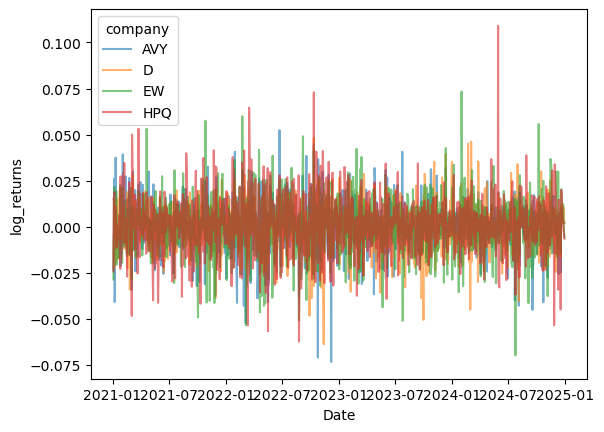

In [19]:
sns.lineplot(data=company_data, x="Date", y="log_returns", hue="company", alpha=0.6)

<Axes: xlabel='log_returns', ylabel='Density'>

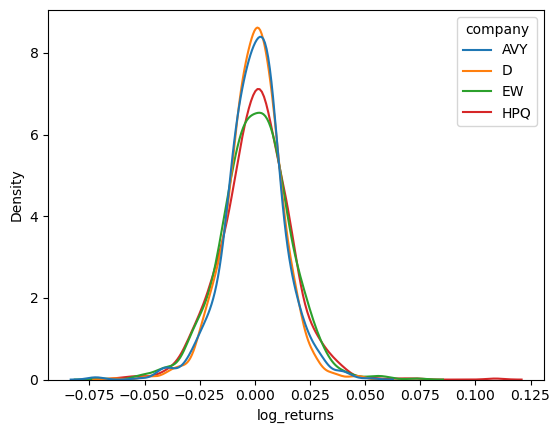

In [20]:
sns.kdeplot(data=company_data, x="log_returns", hue="company")

In [22]:
snp_df = pd.read_csv("companies_no_subindustry.csv")

In [23]:
print(snp_df)

    Symbol              Security             GICS_Sector  \
0      MMM                    3M             Industrials   
1      AOS           A. O. Smith             Industrials   
2      ABT                Abbott             Health Care   
3     ABBV                AbbVie             Health Care   
4     ABMD               Abiomed             Health Care   
..     ...                   ...                     ...   
498    YUM           Yum! Brands  Consumer Discretionary   
499   ZBRA    Zebra Technologies  Information Technology   
500    ZBH         Zimmer Biomet             Health Care   
501   ZION  Zions Bancorporation              Financials   
502    ZTS                Zoetis             Health Care   

                          hq    included      Founded  
0      Saint Paul, Minnesota  09.08.1976         1902  
1       Milwaukee, Wisconsin  26.07.2017         1916  
2    North Chicago, Illinois  31.03.1964         1888  
3    North Chicago, Illinois  31.12.2012  2013 (1888)  

In [28]:
snp_df.loc[pd.isna(snp_df["included"])].count()

Symbol         45
Security       45
GICS_Sector    45
hq             45
included        0
Founded        45
dtype: int64

45 companies are missing the date.

In [31]:
snp_df["Date"]=pd.to_datetime(snp_df["included"],dayfirst=True, errors="coerce")

In [103]:
snp_df["age"] = pd.to_numeric(snp_df["Founded"], errors="coerce").sub(2025) * _

In [104]:
snp_df["age"].median()

-57.0

Oldest constituent:

In [94]:
snp_df.iloc[snp_df["age"].idxmax()]

Symbol                          MO
Security                    Altria
GICS_Sector       Consumer Staples
hq              Richmond, Virginia
included                04.03.1957
Founded                       1985
Date           1957-03-04 00:00:00
age                           68.0
state                     Virginia
Name: 25, dtype: object

In [ ]:
Youngest constituent:

In [95]:
snp_df.iloc[snp_df["age"].idxmin()]

Symbol                        ACGL
Security        Arch Capital Group
GICS_Sector             Financials
hq               Hamilton, Bermuda
included                01.11.2022
Founded                       1995
Date           2022-11-01 00:00:00
age                            3.0
state                      Bermuda
Name: 48, dtype: object

In [72]:
snp_grouped = pd.DataFrame(snp_df.groupby("GICS_Sector")["Symbol"].count())
print(snp_grouped)

                        Symbol
GICS_Sector                   
Communication Services      25
Consumer Discretionary      56
Consumer Staples            33
Energy                      23
Financials                  67
Health Care                 64
Industrials                 71
Information Technology      75
Materials                   28
Real Estate                 31
Utilities                   30


<Axes: xlabel='GICS_Sector', ylabel='Symbol'>

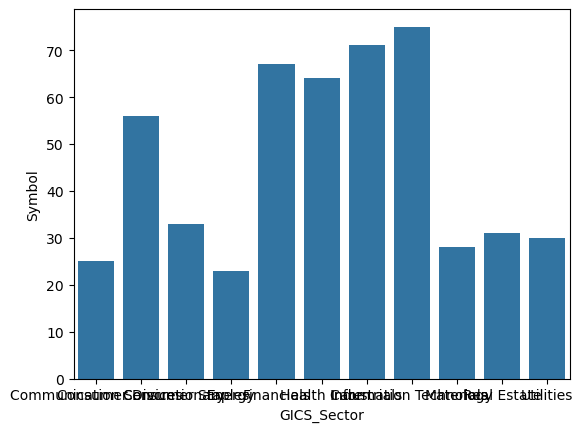

In [75]:
sns.barplot(data=snp_grouped, x="GICS_Sector", y="Symbol")

In [78]:
import matplotlib.pyplot as plt

([<matplotlib.patches.Wedge at 0x1aeb645ee90>,
 [Text(1.0866179109935106, 0.17105997634776943, 'G'),
  Text(0.8676101487027318, 0.6762045769351342, 'I'),
  Text(0.38016461565471343, 1.0322184192331119, 'C'),
  Text(0.003435033538571298, 1.0999946365981013, 'S'),
  Text(-0.5833642622882735, 0.9325696421634465, '_'),
  Text(-1.0794461775762025, 0.21165053677259035, 'S'),
  Text(-0.8759889281351285, -0.6653145104269625, 'e'),
  Text(-0.010305097751665417, -1.0999517284682674, 'c'),
  Text(0.6515563912382341, -0.8862698624214915, 't'),
  Text(0.9270637966198272, -0.5920749251546057, 'o'),
  Text(1.0807471675404638, -0.20490378193987743, 'r')])

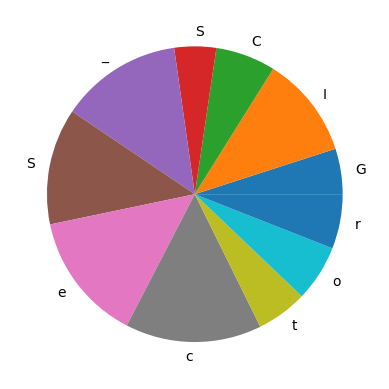

In [81]:
plt.pie(data=snp_grouped, x="Symbol", labels="GICS_Sector")

In [85]:
snp_df["state"]=snp_df["hq"].str.split(",").str.get(1)

In [88]:
snp_state = pd.DataFrame(snp_df.groupby("state")["Symbol"].count())
print(snp_state)

                             Symbol
state                              
 Alabama                          2
 Arizona                          7
 Arkansas                         3
 Bermuda                          2
 California                      70
 Colorado                         7
 Connecticut                     13
 D.C.                             2
 Delaware                         2
 Florida                         15
 Georgia                         17
 Idaho                            2
 Illinois                        33
 Illinois; Pittsburgh             1
 Indiana                          7
 Iowa                             1
 Ireland                          8
 Israel                           1
 Kentucky                         3
 Louisiana                        3
 Maine                            1
 Maryland                         7
 Massachusetts                   22
 Michigan                        11
 Minnesota                       14
 Missouri                   

<Axes: xlabel='state', ylabel='Symbol'>

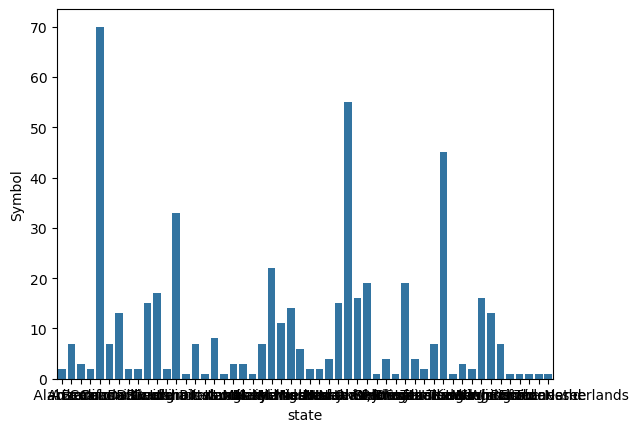

In [90]:
sns.barplot(data=snp_state, x="state", y="Symbol")